AIT-664, DL3

Keith Maly

Week 10 Assignment: Hands-on-2: Classification Models

Due: November 3, 2024

1. Environment Setup
  - System UUID
  - Mount Drive and Wrap text w/in Google Collab
  - Library Import

In [1]:
# capture my UUID within Google Colab
import uuid
my_name = "Keith Maly"
print (my_name + ": " + str(uuid.uuid1()))

Keith Maly: 7066781c-970c-11ef-8fd6-0242ac1c000c


In [2]:
# mount drive, set working directory and wrap text

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/AIT-664/hands-on-2'
#!ls

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/AIT-664/hands-on-2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

2. Import Data, Null Values removal
  - Note: I am using the Boston Housing Set, which is all numeric values, no categorical per the Kaggle Site
  - Assign Target and Response Variables
  - Test Train Split
  - median house price for data


In [10]:
# import data
bost_df = pd.read_csv('Boston-house-price-data.csv')
print('Before null removal', bost_df.shape)

# remove any nulls
bost_df.dropna(inplace=True)
print('After null removal', bost_df.shape)

# determine median house value
med_val = round(bost_df['MEDV'].mean(),3)
print('Median value ($1000)', med_val)

# create med_val_label
bost_df['MEDVL'] = np.where(bost_df['MEDV'] >= med_val, 'ABOVE', 'BELOW')

Before null removal (506, 14)
After null removal (506, 14)
Median value ($1000) 22.533


In [11]:
X = bost_df[['CRIM','ZN','INDUS','CHAS','NOX','RM',
             'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = bost_df['MEDVL']

# Scale the features for better performance of regression models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

3. Classification Models
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Gradient Boost
  - PCA
  - KNN
  - KNN (after tuning)

In [13]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=100, random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)
# Predict on the testing set
y_pred = logistic_model.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

       ABOVE       0.88      0.85      0.87        53
       BELOW       0.92      0.94      0.93        99

    accuracy                           0.91       152
   macro avg       0.90      0.89      0.90       152
weighted avg       0.91      0.91      0.91       152

Confusion Matrix:
 [[45  8]
 [ 6 93]]


In [15]:
# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)
# Predict on the testing set
y_pred = decision_tree.predict(X_test)

predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
173,ABOVE,BELOW
274,ABOVE,ABOVE
491,BELOW,BELOW
72,ABOVE,BELOW
452,BELOW,BELOW
...,...,...
441,BELOW,BELOW
23,BELOW,BELOW
225,ABOVE,ABOVE
433,BELOW,BELOW


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

       ABOVE       0.93      0.79      0.86        53
       BELOW       0.90      0.97      0.93        99

    accuracy                           0.91       152
   macro avg       0.92      0.88      0.89       152
weighted avg       0.91      0.91      0.91       152

Confusion Matrix:
 [[42 11]
 [ 3 96]]


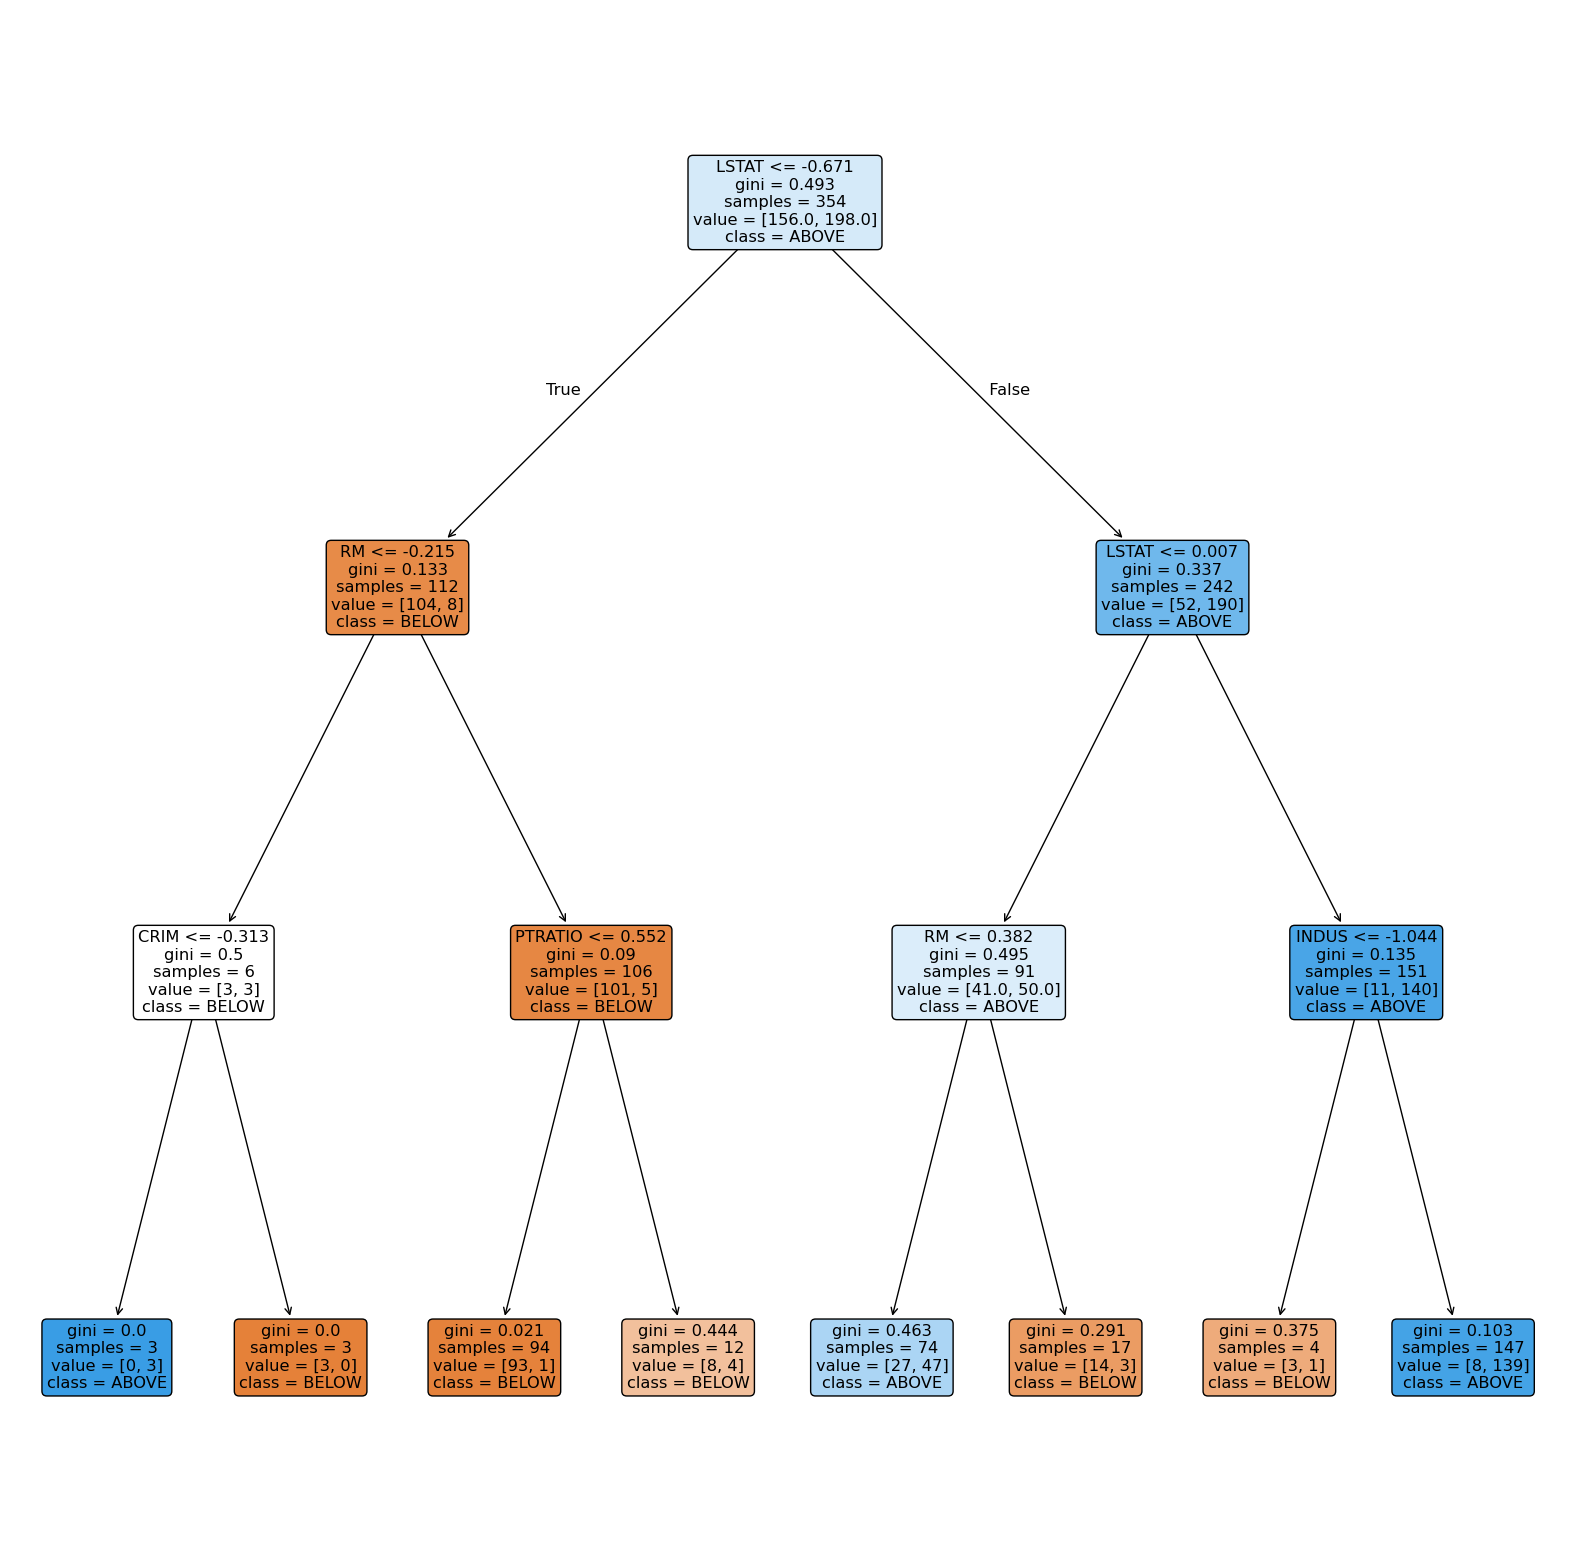

In [22]:
#plot the decision tree
feat_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM',
             'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.figure(figsize=(20, 20))
tree.plot_tree(decision_tree,
               feature_names=feat_names,
               class_names=['BELOW', 'ABOVE'],
               filled=True,
               rounded=True)
plt.show()

In [23]:
#Apply random forest model
random_forest = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, random_state=42)
random_forest.fit(X_train, y_train)
#make predictions
y_pred = random_forest.predict(X_test)

In [24]:
# Get feature importances from the model
feature_importances = random_forest.feature_importances_
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM',
             'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Sort feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
12,LSTAT,0.251065
5,RM,0.202338
10,PTRATIO,0.086463
6,AGE,0.072882
4,NOX,0.069072
2,INDUS,0.067489
7,DIS,0.058288
0,CRIM,0.058284
9,TAX,0.051964
11,B,0.036359


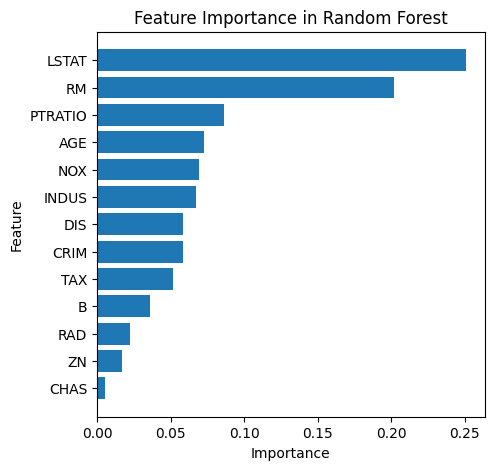

In [27]:
plt.figure(figsize=(5, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

       ABOVE       0.96      0.87      0.91        53
       BELOW       0.93      0.98      0.96        99

    accuracy                           0.94       152
   macro avg       0.95      0.92      0.93       152
weighted avg       0.94      0.94      0.94       152

Confusion Matrix:
 [[46  7]
 [ 2 97]]


In [29]:
# Initialize the GradientBoostingClassifier
gbm = GradientBoostingClassifier(
    n_estimators=100,    # Number of boosting stages (trees)
    learning_rate=0.05,   # Step size for updating weights (lower values make learning slower)
    max_depth=5,         # Maximum depth of individual trees
    random_state=42
)

# Fit the model on the training data
gbm.fit(X_train, y_train)
# Predict on the testing set
y_pred = gbm.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

       ABOVE       0.92      0.85      0.88        53
       BELOW       0.92      0.96      0.94        99

    accuracy                           0.92       152
   macro avg       0.92      0.90      0.91       152
weighted avg       0.92      0.92      0.92       152

Confusion Matrix:
 [[45  8]
 [ 4 95]]


In [31]:
#Apply PCA to the scales data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])

pca_df.head()

,Principal Component 1,Principal Component 2
0,-2.098297,0.773113
1,-1.457252,0.591985
2,-2.074598,0.599639
3,-2.611504,-0.006871
4,-2.458185,0.097712


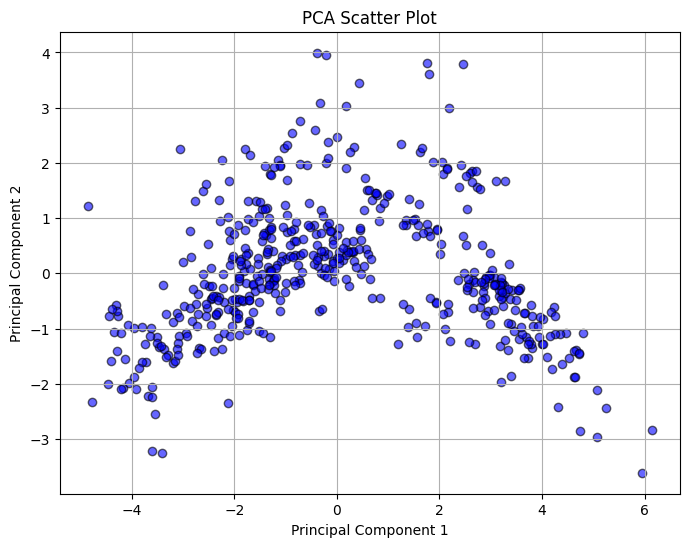

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, c='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()

In [33]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
#set k values initially to 5
k = 5
#apply define model
knn_model = KNeighborsClassifier(n_neighbors=k)
#apply to the trainig data
knn_model.fit(X_train, y_train)
#make predictions using the test data
y_pred = knn_model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

       ABOVE       0.78      0.66      0.71        53
       BELOW       0.83      0.90      0.86        99

    accuracy                           0.82       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.82      0.81       152

Confusion Matrix:
 [[35 18]
 [10 89]]


In [35]:
# Test different values of k and calculate the average accuracy
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")

Best k value: 18


In [36]:
k = 18
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

       ABOVE       0.76      0.70      0.73        53
       BELOW       0.84      0.88      0.86        99

    accuracy                           0.82       152
   macro avg       0.80      0.79      0.79       152
weighted avg       0.81      0.82      0.81       152

Confusion Matrix:
 [[37 16]
 [12 87]]


Accuracy Summary:
  - Logistic Regression: 0.91
  - Decision Tree: 0.91
  - Random Forest: 0.94
  - Gradient Boost: 0.92
  - PCA: 0.82
  - KNN (k=18): 0.82

Analysis: In terms of accuracy, the Random Forest classifier performed the best of the models; while PCA and kNN performed the poorest. Within the RF model, the LSTAT (Logrithmic Status) and RM(number of rooms in dwelling) were, by far, the most important features in the model.